In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pylab
import glob, os
import scipy.stats as stats
from scipy.stats import gaussian_kde
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
import timeit
%matplotlib inline

In [2]:
# Format to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_train = pd.read_csv(r'C:\Users\Angela\Documents\Fast_Trip\KC_90_df_train2.csv')
df_test = pd.read_csv(r'C:\Users\Angela\Documents\Fast_Trip\KC_90_df_test2.csv')

# Read data, training (70%) and validating (30%) dataset 

In [53]:
df_train.columns[:40]

Index([u'Unnamed: 0', u'TRIP_ID', u'RTE', u'VEHICLE_ID', u'BUS_TYPE',
       u'NUM_DOORS', u'STOP_SEQ', u'STOP_ID', u'DWELL_SEC', u'DOOR_OPEN_SEC',
       u'ONS', u'OFFS', u'LOAD', u'date_id', u'capacity', u'Route Type',
       u'pre_load', u'downtown_stop', u'Artic', u'twodoors', u'threedoors',
       u'twodoors_artic', u'threedoors_artic', u'E', u'R', u'ON+OFF',
       u'ma_pasg', u'ab_pasg', u'pre_standees', u'pre_crowding', u'friction',
       u'On_twodoors_artic', u'Off_twodoors_artic', u'on_threedoors_artic',
       u'off_threedoors_artic', u'on_express', u'off_express', u'on_rapid',
       u'off_rapid', u'vehno_date'],
      dtype='object')

# Build multi-linear regression model

# Model 1 - with vehicle ids

Create a LinearRegression object 

In [18]:
# Run Linear Regression In Python SciKit-Learn

#df_train = df_train.dropna()
#df_test = df_test.dropna()
X_train = df_train.drop(['TRIP_ID','RTE','VEHICLE_ID', 'BUS_TYPE', 'NUM_DOORS','STOP_SEQ',\
                         'STOP_ID','DWELL_SEC','DOOR_OPEN_SEC', 'pre_load', 'LOAD', 'date_id', 'capacity', \
                         'downtown_stop', 'ON+OFF', 'Artic','twodoors', 'threedoors', 'ma_pasg','ab_pasg',\
                         'pre_standees', 'pre_crowding','vehno_date', 'Route Type'], axis=1)

X_test = df_test.drop(['TRIP_ID','RTE','VEHICLE_ID', 'BUS_TYPE', 'NUM_DOORS','STOP_SEQ',\
                         'STOP_ID','DWELL_SEC','DOOR_OPEN_SEC', 'pre_load','LOAD', 'date_id', 'capacity', \
                         'downtown_stop', 'ON+OFF', 'Artic','twodoors', 'threedoors','ma_pasg','ab_pasg',\
                        'pre_standees', 'pre_crowding','vehno_date', 'Route Type'], axis=1)

y_train = df_train.DOOR_OPEN_SEC
y_test = df_test.DOOR_OPEN_SEC



In [19]:
start = timeit.default_timer()
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
pred_train = lm1.predict(X_train)
pred_test = lm1.predict(X_test)
LinearRegression(copy_X=True, fit_intercept=True,normalize=False)

# Construct a data frame that contains features and estimated coefficients
sklearn_results1 = pd.DataFrame(zip(X_train.columns, lm1.coef_), columns = ['features', 'estimatedCoefficients'])
# p-values
scores, pvalues = chi2(X_train, y_train)
sklearn_results1['pvalues'] = pd.DataFrame(pvalues)
sklearn_results1['scores'] = pd.DataFrame(scores)

stop = timeit.default_timer()
print 'build model with veh&day ids:', stop - start

build model with veh&day ids: 72.6795965783


In [20]:
sklearn_results1

,features,estimatedCoefficients,pvalues,scores
0,Unnamed: 0,0.000,0.000,42481648.389
1,ONS,3.112,0.000,433364.730
2,OFFS,1.346,0.000,139922.262
3,twodoors_artic,1.414,0.000,1099.346
4,threedoors_artic,7.011,0.000,2783.779
5,E,1.250,0.000,1458.303
6,R,-2.957,0.000,1684.772
7,friction,-0.051,0.000,126115.825
8,On_twodoors_artic,-0.344,0.000,209518.855
9,Off_twodoors_artic,-0.319,0.000,74483.067


In [21]:
R = r2_score(y_train, pred_train) 
print R

0.470263562366


In [22]:
lm1.intercept_

2.904280423594594

In [51]:
i = 0
for value in sklearn_results1.estimatedCoefficients:
    if abs(value) > 8:
        print sklearn_results1[sklearn_results1.estimatedCoefficients == value]
        i += 1
print i

       features  estimatedCoefficients  pvalues  scores
259  2742.0_3.0                -11.684    1.000  35.519
       features  estimatedCoefficients  pvalues  scores
300  2872.0_4.0                 -8.194    1.000  50.877
       features  estimatedCoefficients  pvalues  scores
326  2878.0_3.0                  8.098    0.000 217.053
       features  estimatedCoefficients  pvalues  scores
453  3602.0_2.0                  9.935    0.000 350.484
       features  estimatedCoefficients  pvalues  scores
612  3704.0_3.0                  8.802    0.000 245.301
       features  estimatedCoefficients  pvalues  scores
614  3704.0_5.0                  9.630    0.000 169.833
       features  estimatedCoefficients  pvalues  scores
658  3714.0_3.0                -23.470    1.000  30.260
       features  estimatedCoefficients  pvalues  scores
728  3730.0_5.0                  8.348    0.000 211.285
       features  estimatedCoefficients  pvalues  scores
737  3732.0_3.0                 -8.243    1.000 

In [74]:
for value in [2742, 2872, 2978, 3602, 3704, 3714, 3730, 3732, 3734,  
              3745, 3757, 3759, 4187, 4191, 4193, 4194, 4195, 4196, 
              6046, 6823, 6834, 6837, 6841, 6887, 7030, 7959]:
    print np.unique(df_train[df_train.VEHICLE_ID.astype(int) == value]['threedoors'])

[0]
[0]
[]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[]


# Correlation 

In [ ]:
c = X_train.corr().abs()
s = c.unstack()
so = s.order(kind="quicksort")

In [ ]:
print len(so)
soo = so.dropna()
soo = soo[soo >= 0.500]
soo = soo[soo != 1.0]
print len(soo)

In [ ]:
soo

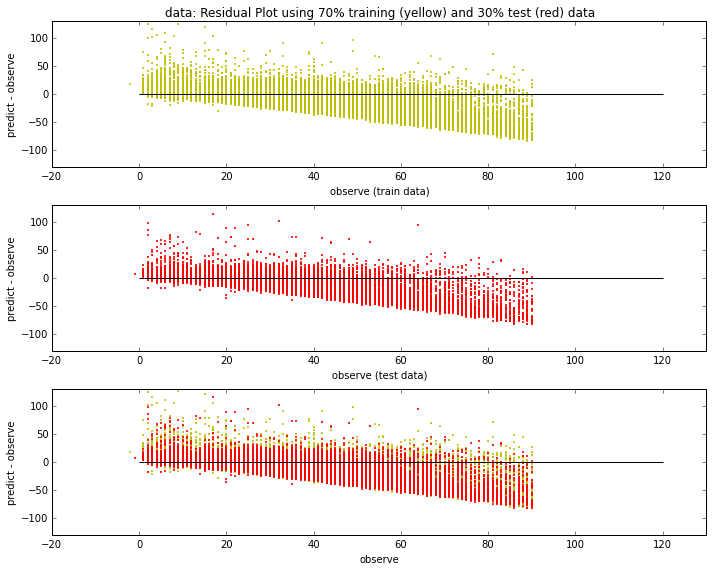

In [9]:
plt.figure(1)

plt.subplot(311)
plt.scatter(y_train, lm1.predict(X_train) - y_train, c='y', s=1,edgecolor='y')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.title('data: Residual Plot using 70% training (yellow) and 30% test (red) data')
plt.ylabel('predict - observe')
plt.xlabel('observe (train data)')

plt.subplot(312)
plt.scatter(y_test, lm1.predict(X_test) - y_test, c='r', s=1,edgecolor='r')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.ylabel('predict - observe')
plt.xlabel('observe (test data)')

plt.subplot(313)
plt.scatter(y_train, lm1.predict(X_train) - y_train, c='y', s=1, edgecolor='y')
plt.scatter(y_test, lm1.predict(X_test) - y_test, c='r', s=1, edgecolor='r')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.ylabel('predict - observe')
plt.xlabel('observe')

plt.tight_layout()
plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

In [ ]:
plt.figure(1)

plt.scatter(y_train, lm1.predict(X_train), c='y', s=1,edgecolor='g')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-10, 130, -30, 130])
plt.title('Train data: observed and predicted data comparison')
plt.ylabel('predict')
plt.xlabel('observe')
plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

In [ ]:
'''
x = y_test
y = lm1.predict(X_test)

# Calculate the point density
start = timeit.default_timer()
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
stop = timeit.default_timer()
print 'finished calculating z:', stop - start

# Sort the points by density, so that the densest points are plotted last
start = timeit.default_timer()
idx = z.argsort()
stop = timeit.default_timer()
print 'finished sorting data:', stop - start

x, y, z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=5, edgecolor='')
plt.axis([0, 130, 0, 130])
plt.title('Test data: scatter plot colored by density')
plt.ylabel('predict')
plt.xlabel('observe')
plt.show()
'''

# Model2 - without vehicle ID

In [12]:
X2_train = df_train[['ONS', 'OFFS', 'threedoors_artic', 'twodoors_artic', 'E', 
                     'On_twodoors_artic', 'Off_twodoors_artic', 
                     'on_threedoors_artic', 'off_threedoors_artic', 'on_express', 
                     'off_express', 'on_rapid', 'off_rapid']]

X2_test = df_test[['ONS', 'OFFS', 'threedoors_artic', 'twodoors_artic', 'E', 
                     'On_twodoors_artic', 'Off_twodoors_artic', 
                     'on_threedoors_artic', 'off_threedoors_artic', 'on_express', 
                     'off_express', 'on_rapid', 'off_rapid']]
y2_train = df_train.DOOR_OPEN_SEC
y2_test = df_test.DOOR_OPEN_SEC

In [13]:
start = timeit.default_timer()
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)
pred_train2 = lm2.predict(X2_train)
pred_test2 = lm2.predict(X2_test)
LinearRegression(copy_X=True, fit_intercept=True,normalize=False)

# Construct a data frame that contains features and estimated coefficients
sklearn_results2 = pd.DataFrame(zip(X2_train.columns, lm2.coef_), columns = ['features', 'estimatedCoefficients'])
# p-values
scores, pvalues = chi2(X2_train, y2_train)
sklearn_results2['pvalues'] = pd.DataFrame(pvalues)
sklearn_results2['scores'] = pd.DataFrame(scores)

stop = timeit.default_timer()
print 'build model with veh&day ids:', stop - start

build model with veh&day ids: 0.476779738117


In [14]:
print sklearn_results2

                features  estimatedCoefficients  pvalues     scores
0                    ONS                  3.137    0.000 433364.730
1                   OFFS                  1.379    0.000 139922.262
2       threedoors_artic                  1.875    0.000   2783.779
3         twodoors_artic                  0.751    0.000   1099.346
4                      E                  0.727    0.000   1458.303
5      On_twodoors_artic                 -0.395    0.000 209518.855
6     Off_twodoors_artic                 -0.379    0.000  74483.067
7    on_threedoors_artic                 -0.127    0.000 160967.176
8   off_threedoors_artic                  0.074    0.000  62761.778
9             on_express                 -0.303    0.000 134800.037
10           off_express                 -0.182    0.000  50850.591
11              on_rapid                 -1.062    0.000 125986.455
12             off_rapid                 -0.597    0.000  47366.765


In [15]:
#sklearn_results2.to_csv('R:/Angela/fast_trips/KCMetro/Final_withoutVeh_friction.csv')

In [16]:
# R-square
R22 = r2_score(y2_train, pred_train2) 
print R22

0.445837015292


In [17]:
lm2.intercept_

5.616598970759366

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


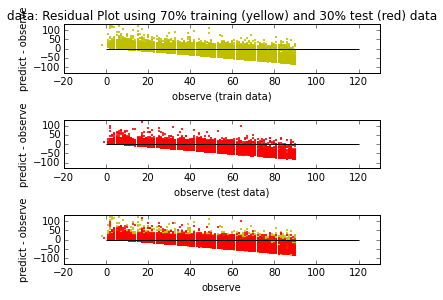

In [10]:
plt.figure(1)
plt.subplot(311)
plt.scatter(y2_train, lm2.predict(X2_train) - y2_train, c='y', s=1,edgecolor='y')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.title('data: Residual Plot using 70% training (yellow) and 30% test (red) data')
plt.ylabel('predict - observe')
plt.xlabel('observe (train data)')

plt.subplot(312)
plt.scatter(y2_test, lm2.predict(X2_test) - y2_test, c='r', s=1,edgecolor='r')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.ylabel('predict - observe')
plt.xlabel('observe (test data)')

plt.subplot(313)
plt.scatter(y2_train, lm2.predict(X2_train) - y2_train, c='y', s=1, edgecolor='y')
plt.scatter(y2_test, lm2.predict(X2_test) - y2_test, c='r', s=1, edgecolor='r')

plt.tight_layout()
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.ylabel('predict - observe')
plt.xlabel('observe')

plt.show()

z: 498.664222254
sort data: 0.00698942696363


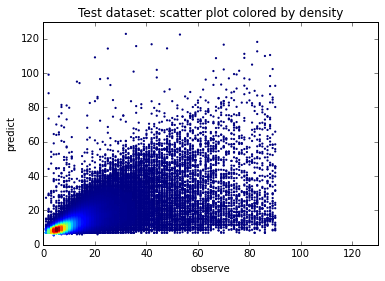

In [11]:
#density plots

x2 = y2_test
y2 = lm2.predict(X2_test)

# Calculate the point density
start = timeit.default_timer()
xy2 = np.vstack([x2,y2])
z2 = gaussian_kde(xy2)(xy2)
stop = timeit.default_timer()
print 'z:', stop - start

# Sort the points by density, so that the densest points are plotted last
start = timeit.default_timer()
idx = z2.argsort()
stop = timeit.default_timer()
print 'sort data:', stop - start

x2, y2, z2 = x2[idx], y2[idx], z2[idx]
fig, ax = plt.subplots()
ax.scatter(x2, y2, c=z2, s=5, edgecolor='')

plt.axis([0, 130, 0, 130])
plt.title('Test dataset: scatter plot colored by density')
plt.ylabel('predict')
plt.xlabel('observe')

plt.show()


# Regression model enhancement - Stepwide 

In [1]:
def forward_selected(data, response):
        """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response, 
                                          ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, 
                                  ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model 

In [9]:
test_data1 = df_train[['ONS', 'OFFS', 'threedoors_artic', 'twodoors_artic', 'E', 'R', 
                     'ab_pasg','ma_pasg', 'friction', 'On_twodoors_artic', 'Off_twodoors_artic', 
                     'on_threedoors_artic', 'off_threedoors_artic', 'on_express', 
                     'off_express', 'on_rapid', 'off_rapid', 'DOOR_OPEN_SEC']]

In [10]:
test_model1 = forward_selected(test_data1, 'DOOR_OPEN_SEC')

In [11]:
test_model1.params

Intercept               5.744
ONS                     3.328
OFFS                    1.592
on_rapid               -0.880
On_twodoors_artic      -0.380
ab_pasg                -0.325
threedoors_artic        3.350
off_rapid              -0.431
Off_twodoors_artic     -0.350
twodoors_artic          0.676
on_express             -0.248
friction               -0.064
R                      -1.706
on_threedoors_artic    -0.295
off_express            -0.139
E                       0.633
off_threedoors_artic   -0.107
dtype: float64

In [12]:
test_model1.pvalues

Intercept              0.000
ONS                    0.000
OFFS                   0.000
on_rapid               0.000
On_twodoors_artic      0.000
ab_pasg                0.000
threedoors_artic       0.000
off_rapid              0.000
Off_twodoors_artic     0.000
twodoors_artic         0.000
on_express             0.000
friction               0.000
R                      0.000
on_threedoors_artic    0.000
off_express            0.000
E                      0.000
off_threedoors_artic   0.001
dtype: float64

In [13]:
test_model1.rsquared

0.44856315011107251

# Step 3: delete express bus 

In [85]:
df_train3 = df_train
df_test3 = df_test

In [86]:
df_train3.columns[:50]

Index([u'Unnamed: 0', u'TRIP_ID', u'RTE', u'VEHICLE_ID', u'BUS_TYPE',
       u'NUM_DOORS', u'STOP_SEQ', u'STOP_ID', u'DWELL_SEC', u'DOOR_OPEN_SEC',
       u'ONS', u'OFFS', u'LOAD', u'date_id', u'capacity', u'Route Type',
       u'pre_load', u'downtown_stop', u'Artic', u'twodoors', u'threedoors',
       u'twodoors_artic', u'threedoors_artic', u'E', u'R', u'ON+OFF',
       u'ma_pasg', u'ab_pasg', u'pre_standees', u'pre_crowding', u'friction',
       u'On_twodoors_artic', u'Off_twodoors_artic', u'on_threedoors_artic',
       u'off_threedoors_artic', u'on_express', u'off_express', u'on_rapid',
       u'off_rapid', u'vehno_date', u'1100.0_1.0', u'1100.0_2.0',
       u'1100.0_3.0', u'1100.0_4.0', u'1100.0_5.0', u'1100.0_6.0',
       u'1101.0_2.0', u'1101.0_4.0', u'1101.0_5.0', u'1101.0_6.0'],
      dtype='object')

In [116]:
X3_train = df_train3[['ONS', 'OFFS', 'threedoors_artic', 'twodoors_artic', 'R', 
                     'On_twodoors_artic', 'Off_twodoors_artic', 
                     'on_threedoors_artic', 'off_threedoors_artic',  
                      'on_rapid', 'off_rapid', 'friction']]

X3_test = df_test3[['ONS', 'OFFS', 'threedoors_artic', 'twodoors_artic', 'R', 
                     'On_twodoors_artic', 'Off_twodoors_artic', 
                     'on_threedoors_artic', 'off_threedoors_artic', 
                      'on_rapid', 'off_rapid', 'friction']]
y3_train = df_train3['DOOR_OPEN_SEC']
y3_test = df_test3['DOOR_OPEN_SEC']

In [117]:
start = timeit.default_timer()
lm3 = LinearRegression()
lm3.fit(X3_train, y3_train)
pred_train3 = lm3.predict(X3_train)
pred_test3 = lm3.predict(X3_test)
LinearRegression(copy_X=True, fit_intercept=True,normalize=False)

# Construct a data frame that contains features and estimated coefficients
sklearn_results3 = pd.DataFrame(zip(X3_train.columns, lm3.coef_), columns = ['features', 'estimatedCoefficients'])
# p-values
scores, pvalues = chi2(X3_train, y3_train)
sklearn_results3['pvalues'] = pd.DataFrame(pvalues)
sklearn_results3['scores'] = pd.DataFrame(scores)

stop = timeit.default_timer()
print 'build model with veh&day ids:', stop - start

build model with veh&day ids: 0.450959251088


In [118]:
sklearn_results3

,features,estimatedCoefficients,pvalues,scores
0,ONS,3.122,0.000,433364.730
1,OFFS,1.379,0.000,139922.262
2,threedoors_artic,3.358,0.000,2783.779
3,twodoors_artic,1.018,0.000,1099.346
4,R,-1.772,0.000,1684.772
5,On_twodoors_artic,-0.524,0.000,209518.855
6,Off_twodoors_artic,-0.455,0.000,74483.067
7,on_threedoors_artic,-0.280,0.000,160967.176
8,off_threedoors_artic,-0.095,0.000,62761.778
9,on_rapid,-0.867,0.000,125986.455


In [121]:
R3 = r2_score(y3_train, pred_train3) 
print R3

0.445387890945


In [122]:
lm3.intercept_ 

5.6394167855668638

# Step 4: delete express bus and look into rapid bus  

In [10]:
df_train4 = df_train
df_test4 = df_test

In [13]:
df_train4.columns[:50]

Index([u'Unnamed: 0', u'TRIP_ID', u'RTE', u'VEHICLE_ID', u'BUS_TYPE',
       u'NUM_DOORS', u'STOP_SEQ', u'STOP_ID', u'DWELL_SEC', u'DOOR_OPEN_SEC',
       u'ONS', u'OFFS', u'LOAD', u'date_id', u'capacity', u'Route Type',
       u'pre_load', u'downtown_stop', u'Artic', u'twodoors', u'threedoors',
       u'twodoors_artic', u'threedoors_artic', u'E', u'R', u'ON+OFF',
       u'ma_pasg', u'ab_pasg', u'pre_standees', u'pre_crowding', u'friction',
       u'On_twodoors_artic', u'Off_twodoors_artic', u'on_threedoors_artic',
       u'off_threedoors_artic', u'on_express', u'off_express', u'on_rapid',
       u'off_rapid', u'vehno_date', u'1100.0_1.0', u'1100.0_2.0',
       u'1100.0_3.0', u'1100.0_4.0', u'1100.0_5.0', u'1100.0_6.0',
       u'1101.0_2.0', u'1101.0_4.0', u'1101.0_5.0', u'1101.0_6.0'],
      dtype='object')

In [39]:
df_train4['artic_three_rap'] = df_train4['Artic']*df_train4['threedoors']*df_train4['R']
df_test4['artic_three_rap'] = df_test4['Artic']*df_test4['threedoors']*df_test4['R']

In [29]:
df_train4['on_artic_three_rap'] = df_train4['ONS']*df_train4['Artic']*df_train4['threedoors']*df_train4['R']
df_train4['off_artic_three_rap'] = df_train4['OFFS']*df_train4['Artic']*df_train4['threedoors']*df_train4['R']
df_train4['on_artic_two'] = df_train4['ONS']*df_train4['Artic']*df_train4['twodoors']
df_train4['off_artic_two'] = df_train4['OFFS']*df_train4['Artic']*df_train4['twodoors']

In [33]:
df_test4['on_artic_three_rap'] = df_test4['ONS']*df_test4['Artic']*df_test4['threedoors']*df_test4['R']
df_test4['off_artic_three_rap'] = df_test4['OFFS']*df_test4['Artic']*df_test4['threedoors']*df_test4['R']
df_test4['on_artic_two'] = df_test4['ONS']*df_test4['Artic']*df_test4['twodoors']
df_test4['off_artic_two'] = df_test4['OFFS']*df_test4['Artic']*df_test4['twodoors']

In [70]:
df_train4['non_rapid'] = df_train4.apply(lambda x: x['R'] > 0, axis=1).map({False:1, True:0})

In [71]:
df_test4['non_rapid'] = df_test4.apply(lambda x: x['R'] > 0, axis=1).map({False:1, True:0})

In [72]:
df_train4['on_artic_three_nonrap'] = df_train4['ONS']*df_train4['Artic']*df_train4['threedoors']*df_train4['non_rapid']
df_test4['on_artic_three_nonrap'] = df_test4['ONS']*df_test4['Artic']*df_test4['threedoors']*df_test4['non_rapid']

In [73]:
df_train4['off_artic_three_nonrap'] = df_train4['OFFS']*df_train4['Artic']*df_train4['threedoors']*df_train4['non_rapid']
df_test4['off_artic_three_nonrap'] = df_test4['OFFS']*df_test4['Artic']*df_test4['threedoors']*df_test4['non_rapid']

In [74]:
df_train4['artic_three_nonrap'] = df_train4['Artic']*df_train4['threedoors']*df_train4['non_rapid']
df_test4['artic_three_nonrap'] = df_test4['Artic']*df_test4['threedoors']*df_test4['non_rapid']

In [75]:
df_train4.columns[-10:]

Index([u'9651.0_5.0', u'on_artic_three_rap', u'off_artic_three_rap',
       u'on_artic_two', u'off_artic_two', u'artic_three_rap', u'non_rapid',
       u'on_artic_three_nonrap', u'off_artic_three_nonrap',
       u'artic_three_nonrap'],
      dtype='object')

In [76]:
X4_train = df_train4[['ONS', 'OFFS', 'twodoors_artic', 'artic_three_rap','artic_three_nonrap',
                     'friction',
                     'on_artic_three_rap', 'off_artic_three_rap','on_artic_two', 'off_artic_two',
                     'on_artic_three_nonrap','off_artic_three_nonrap' ]]

X4_test = df_test4[['ONS', 'OFFS', 'twodoors_artic',  'artic_three_rap','artic_three_nonrap',
                      'friction',
                    'on_artic_three_rap', 'off_artic_three_rap','on_artic_two', 'off_artic_two',
                   'on_artic_three_nonrap','off_artic_three_nonrap' ]]
y4_train = df_train4['DOOR_OPEN_SEC']
y4_test = df_test4['DOOR_OPEN_SEC']

In [77]:
start = timeit.default_timer()
lm4 = LinearRegression()
lm4.fit(X4_train, y4_train)
pred_train4 = lm4.predict(X4_train)
pred_test4 = lm4.predict(X4_test)
LinearRegression(copy_X=True, fit_intercept=True,normalize=False)

# Construct a data frame that contains features and estimated coefficients
sklearn_results4 = pd.DataFrame(zip(X4_train.columns, lm4.coef_), columns = ['features', 'estimatedCoefficients'])
# p-values
scores, pvalues = chi2(X4_train, y4_train)
sklearn_results4['pvalues'] = pd.DataFrame(pvalues)
sklearn_results4['scores'] = pd.DataFrame(scores)

stop = timeit.default_timer()
print 'build model with veh&day ids:', stop - start

build model with veh&day ids: 1.57078723518


In [78]:
sklearn_results4

,features,estimatedCoefficients,pvalues,scores
0,ONS,3.122,0.000,433364.730
1,OFFS,1.379,0.000,139922.262
2,twodoors_artic,1.018,0.000,1099.346
3,artic_three_rap,1.586,0.000,1684.772
4,artic_three_nonrap,3.358,0.000,3064.325
5,friction,-0.050,0.000,126115.825
6,on_artic_three_rap,-1.147,0.000,125986.455
7,off_artic_three_rap,-0.490,0.000,47366.765
8,on_artic_two,-0.524,0.000,209518.855
9,off_artic_two,-0.455,0.000,74483.067


In [79]:
#tried put express bus into the model, doesn't make sense
X4_train = df_train4[['ONS', 'OFFS', 'twodoors_artic', 'artic_three_rap','artic_three_nonrap',
                     'friction','E', 'on_express', 'off_express',
                     'on_artic_three_rap', 'off_artic_three_rap','on_artic_two', 'off_artic_two',
                     'on_artic_three_nonrap','off_artic_three_nonrap' ]]

X4_test = df_test4[['ONS', 'OFFS', 'twodoors_artic',  'artic_three_rap','artic_three_nonrap',
                      'friction','E', 'on_express', 'off_express',
                    'on_artic_three_rap', 'off_artic_three_rap','on_artic_two', 'off_artic_two',
                   'on_artic_three_nonrap','off_artic_three_nonrap' ]]
y4_train = df_train4['DOOR_OPEN_SEC']
y4_test = df_test4['DOOR_OPEN_SEC']

In [80]:
start = timeit.default_timer()
lm4 = LinearRegression()
lm4.fit(X4_train, y4_train)
pred_train4 = lm4.predict(X4_train)
pred_test4 = lm4.predict(X4_test)
LinearRegression(copy_X=True, fit_intercept=True,normalize=False)

# Construct a data frame that contains features and estimated coefficients
sklearn_results4 = pd.DataFrame(zip(X4_train.columns, lm4.coef_), columns = ['features', 'estimatedCoefficients'])
# p-values
scores, pvalues = chi2(X4_train, y4_train)
sklearn_results4['pvalues'] = pd.DataFrame(pvalues)
sklearn_results4['scores'] = pd.DataFrame(scores)

stop = timeit.default_timer()
print 'build model with veh&day ids:', stop - start

build model with veh&day ids: 0.508059134023


In [92]:
R4 = r2_score(y4_train, pred_train4) 
print R4

0.446279975467


In [82]:
sklearn_results4

,features,estimatedCoefficients,pvalues,scores
0,ONS,3.140,0.000,433364.730
1,OFFS,1.389,0.000,139922.262
2,twodoors_artic,0.738,0.000,1099.346
3,artic_three_rap,1.620,0.000,1684.772
4,artic_three_nonrap,3.391,0.000,3064.325
5,friction,-0.048,0.000,126115.825
6,E,0.715,0.000,1458.303
7,on_express,-0.302,0.000,134800.037
8,off_express,-0.180,0.000,50850.591
9,on_artic_three_rap,-1.165,0.000,125986.455


In [94]:
lm4.intercept_ 

5.6063255653535098

In [61]:
X5_train = df_train4[['ONS', 'OFFS', 'twodoors_artic', 'artic_three_rap',
                     'friction', 'ab_pasg', 'ma_pasg',
                      'E','on_express', 
                     'off_express',
                     'on_artic_three_rap', 'off_artic_three_rap','on_artic_two', 'off_artic_two' ]]

In [62]:
c = X5_train.corr().abs()
s = c.unstack()
so = s.order(kind="quicksort")

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


In [64]:
so[-50:]

off_artic_three_rap  OFFS                  0.469
OFFS                 off_artic_three_rap   0.469
off_express          E                     0.471
E                    off_express           0.471
off_artic_two        ab_pasg               0.494
ab_pasg              off_artic_two         0.494
off_express          OFFS                  0.497
OFFS                 off_express           0.497
ma_pasg              off_artic_two         0.508
off_artic_two        ma_pasg               0.508
artic_three_rap      on_artic_three_rap    0.508
on_artic_three_rap   artic_three_rap       0.508
on_express           E                     0.511
E                    on_express            0.511
off_artic_three_rap  artic_three_rap       0.518
artic_three_rap      off_artic_three_rap   0.518
ONS                  ab_pasg               0.545
ab_pasg              ONS                   0.545
ONS                  on_artic_three_rap    0.552
on_artic_three_rap   ONS                   0.552
ONS                 

# Plotting Scatter, by appling the dewell time model with the rest 30% data

In [38]:
df_est = []
df_est = pd.DataFrame(lm2.predict(X2_test), index = X2_test.index, columns = ['Dwell_Time_Esti'])
test = pd.concat([X2_test, df_est], axis=1, join='inner')
test['on+off'] = test['ONS']+test['OFFS']
test.columns

Index([u'ONS', u'OFFS', u'threedoors_artic', u'twodoors_artic', u'E', u'R',
       u'ab_pasg', u'On_twodoors_artic', u'Off_twodoors_artic',
       u'on_threedoors_artic', u'off_threedoors_artic', u'on_express',
       u'off_express', u'on_rapid', u'off_rapid', u'Dwell_Time_Esti',
       u'on+off'],
      dtype='object')

In [39]:
#Create dataframe for specific groups
test_StandardService = test[(test.threedoors_artic != 1) & (test.twodoors_artic != 1)]
test_TwoDoorsArtic = test[(test.twodoors_artic == 1)]
test_ThreeDoorsArtic = test[(test.threedoors_artic == 1)]
test_RapidRide = test[test.R == 1]
test_Express = test[test.E == 1]
test_Local = test[(test.R == 0)&(test.E == 0)]


31600 31600


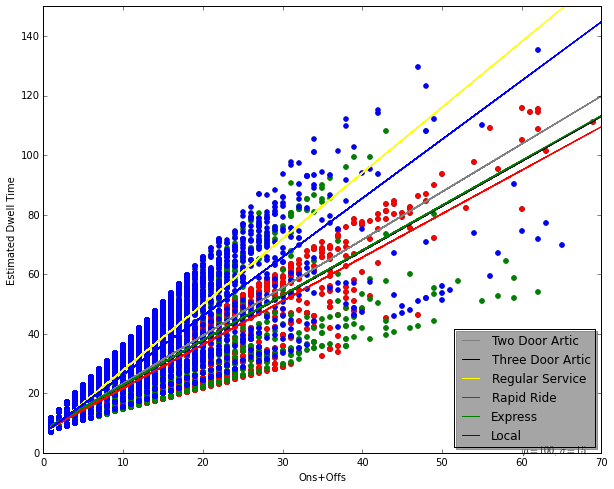

In [40]:
fig, ax = plt.subplots()

# plot the data itself
x1 = test_TwoDoorsArtic['on+off']
y1 = test_TwoDoorsArtic['Dwell_Time_Esti']
print len(x1), len(y1)
# plot the data itself
ax.scatter(x1, y1, color = 'grey')
#plot the trend line
fit = np.polyfit(x1, y1, deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color='grey', label='Two Door Artic')

x2 = test_ThreeDoorsArtic['on+off']
y2 = test_ThreeDoorsArtic['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x2, y2, color = 'black')
#plot the trend line
fit = np.polyfit(x2, y2, deg=1)
ax.plot(x2, fit[0] * x2 + fit[1], color='black', label='Three Door Artic')

# plot the data itself
x3 = test_StandardService['on+off']
y3 = test_StandardService['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x3, y3, color = 'yellow')
#plot the trend line
fit = np.polyfit(x3, y3, deg=1)
ax.plot(x3, fit[0] * x3 + fit[1], color='yellow', label= 'Regular Service')

x4 = test_RapidRide['on+off']
y4 = test_RapidRide['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x4, y4, color = 'red')
#plot the trend line
fit = np.polyfit(x4, y4, deg=1)
ax.plot(x4, fit[0] * x4 + fit[1], color='red', label= 'Rapid Ride')

x5 = test_Express['on+off']
y5 = test_Express['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x5, y5, color = 'green')
#plot the trend line
fit = np.polyfit(x5, y5, deg=1)
ax.plot(x5, fit[0] * x5 + fit[1], color='green', label= 'Express')

x6 = test_Local['on+off']
y6 = test_Local['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x6, y6, color = 'blue')
#plot the trend line
fit = np.polyfit(x6, y6, deg=1)
ax.plot(x6, fit[0] * x6 + fit[1], color='blue', label= 'Local')



plt.xlabel('Ons+Offs')
plt.ylabel('Estimated Dwell Time')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
ax.legend(loc='lower right', shadow=True)
#plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.axis([0, 70, 0, 150])

fig.show()

#three doors trend is exactly as same as rapid ride bus... 

In [41]:
#Estimate dwell time for the 'test' dataset
df_est = []
df_est = pd.DataFrame(lm2.predict(X2_test), index = X2_test.index, columns = ['Dwell_Time_Esti'])
test = pd.concat([X2_test, df_est], axis=1, join='inner')
test.head()

,ONS,OFFS,threedoors_artic,twodoors_artic,E,R,ab_pasg,On_twodoors_artic,Off_twodoors_artic,on_threedoors_artic,off_threedoors_artic,on_express,off_express,on_rapid,off_rapid,Dwell_Time_Esti
0,7.000,0.000,0,0,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,26.768
1,3.000,1.000,0,0,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.654
2,1.000,0.000,0,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.757
3,16.000,0.000,0,0,0.000,0.000,16.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,53.784
4,4.000,0.000,0,0,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,17.762


In [42]:
test.columns

Index([u'ONS', u'OFFS', u'threedoors_artic', u'twodoors_artic', u'E', u'R',
       u'ab_pasg', u'On_twodoors_artic', u'Off_twodoors_artic',
       u'on_threedoors_artic', u'off_threedoors_artic', u'on_express',
       u'off_express', u'on_rapid', u'off_rapid', u'Dwell_Time_Esti'],
      dtype='object')

31600 31600


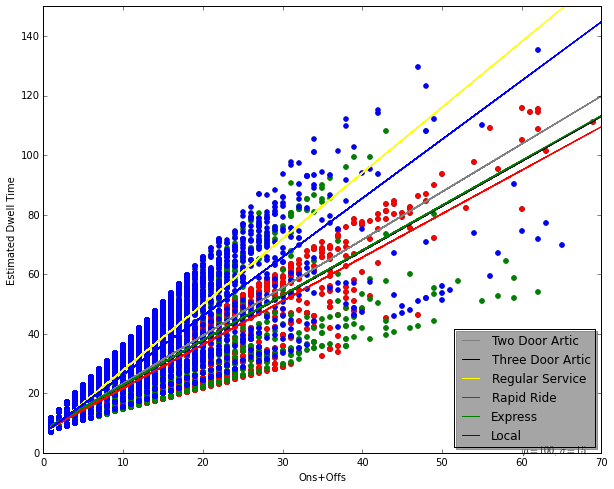

In [44]:
fig, ax = plt.subplots()

# plot the data itself
x1 = test_TwoDoorsArtic['on+off']
y1 = test_TwoDoorsArtic['Dwell_Time_Esti']
print len(x1), len(y1)
# plot the data itself
ax.scatter(x1, y1, color = 'grey')
#plot the trend line
fit = np.polyfit(x1, y1, deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color='grey', label='Two Door Artic')

x2 = test_ThreeDoorsArtic['on+off']
y2 = test_ThreeDoorsArtic['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x2, y2, color = 'black')
#plot the trend line
fit = np.polyfit(x2, y2, deg=1)
ax.plot(x2, fit[0] * x2 + fit[1], color='black', label='Three Door Artic')

# plot the data itself
x3 = test_StandardService['on+off']
y3 = test_StandardService['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x3, y3, color = 'yellow')
#plot the trend line
fit = np.polyfit(x3, y3, deg=1)
ax.plot(x3, fit[0] * x3 + fit[1], color='yellow', label= 'Regular Service')

x4 = test_RapidRide['on+off']
y4 = test_RapidRide['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x4, y4, color = 'red')
#plot the trend line
fit = np.polyfit(x4, y4, deg=1)
ax.plot(x4, fit[0] * x4 + fit[1], color='red', label= 'Rapid Ride')

x5 = test_Express['on+off']
y5 = test_Express['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x5, y5, color = 'green')
#plot the trend line
fit = np.polyfit(x5, y5, deg=1)
ax.plot(x5, fit[0] * x5 + fit[1], color='green', label= 'Express')

x6 = test_Local['on+off']
y6 = test_Local['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x6, y6, color = 'blue')
#plot the trend line
fit = np.polyfit(x6, y6, deg=1)
ax.plot(x6, fit[0] * x6 + fit[1], color='blue', label= 'Local')



plt.xlabel('Ons+Offs')
plt.ylabel('Estimated Dwell Time')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
ax.legend(loc='lower right', shadow=True)
#plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.axis([0, 70, 0, 150])

fig.show()

#three doors trend is exactly as same as rapid ride bus... 

In [ ]:
print 'end'